## Assignment Information

| Field | Details |
|-------|---------|
| **Name** | Pros Loung |
| **Course** | AAI-521 Applied Computer Vision for AI |
| **Assignment** | 4.1 - Advanced Vision Problem|
| **GitHub Repository** | https://github.com/ploung/AAI_521_ComputerVision_Module4.git |

---

### Assignment Overview

**Part 1- Feature extraction**

In [7]:
#Start with uploading the required images on Google drive
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [8]:
# Map Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


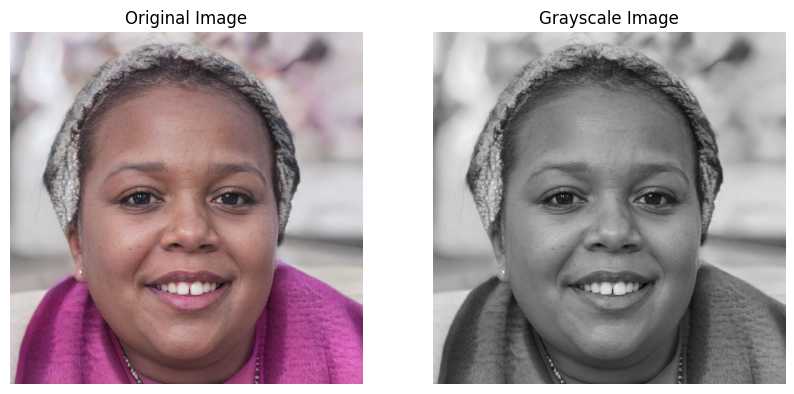

In [10]:
# Read the original image pic1 and create a regular plus a gray version of it.
# The result should be similar to what you see in instrcutions

img_rgb = cv2.imread('/content/drive/MyDrive/AAI_521_ComputerVision_Module4/Assignment4_pic1.jpg')
#img_rgb = cv2.imread('./Assignment4_pic1.jpg') # Local Machine
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

f = plt.figure(figsize=(10, 5))
f.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

f.add_subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

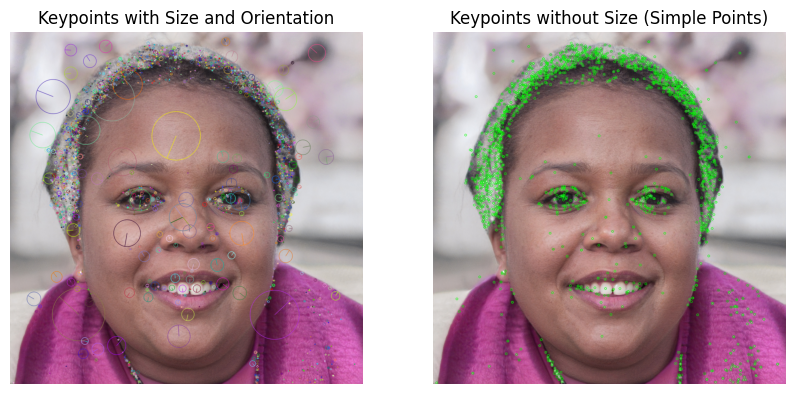

Number of SIFT keypoints detected: 1857
Descriptor shape: (1857, 128)


In [11]:
#a- SIFT
sift = cv2.xfeatures2d.SIFT_create()
# Find detect and compute function and apply it on top of sift
original_keypoints, original_descriptor = sift.detectAndCompute(img_gray, None)

# Draw the result here
# For rich keypoints (with size and orientation)
result1 = cv2.drawKeypoints(img_rgb, original_keypoints, None,
                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# For simple keypoints (just points)
result2 = cv2.drawKeypoints(img_rgb, original_keypoints, None,
                           color=(0, 255, 0))

# Show the result here
f = plt.figure(figsize=(10, 5))
f.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.title('Keypoints with Size and Orientation')
plt.axis('off')

f.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('Keypoints without Size (Simple Points)')
plt.axis('off')
plt.show()

print(f"Number of SIFT keypoints detected: {len(original_keypoints)}")
if original_descriptor is not None:
    print(f"Descriptor shape: {original_descriptor.shape}")

### **Explain your understanding here:**

SIFT is an algorithm for detecting distinctive features in images that are invariant to scale, rotation, and illumination changes.

**Code Explanation:**
1) SIFT Creation: Creates the SIFT detector object
2) Feature Detection:
    - Finds keypoints (interesting points) in the grayscale image
    - Computes descriptors (feature vectors) for each keypoint
3) Draw kek features on the images with two Different Visualizations:
    - result1: Uses DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag to show:
        - Keypoint locations as circles
        - Circle size represents the scale/size of the feature
        - Lines show the orientation of the feature

    - result2: Simple visualization showing:
        - Keypoint locations as small green dots
        - No size or orientation information

**Picture Explanation:**
    The image (left) shows rich keypoint visualization with SIFT features. The colored circles of varying sizes indicate keypoint locations. The circle size represents the scale at which the feature was detected. The features are detected on hair texture, facial features, clothing texture, and background elements The image (right) shows simplified keypoint visualization. The green dots mark the exact same keypoint locations as the image on the left, but easier to see the density and distribution of the detected features.

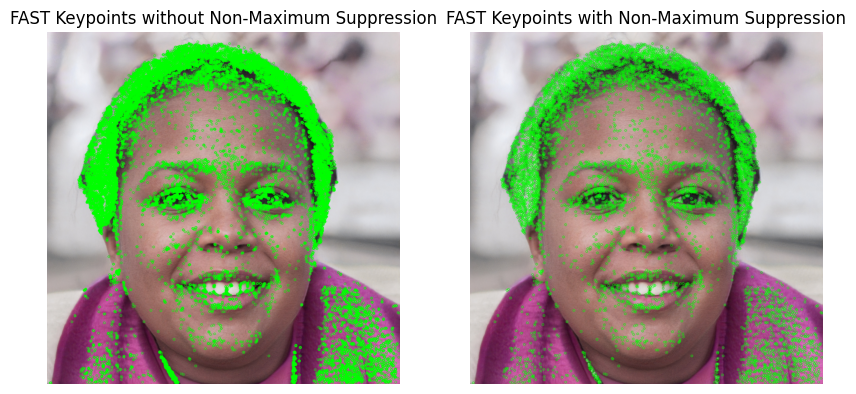

Number of FAST keypoints without non-max suppression: 27512
Number of FAST keypoints with non-max suppression: 7051


In [ ]:
# b- FAST
fast = cv2.FastFeatureDetector_create()

# Detect keypoints without non-maximum suppression
fast.setNonmaxSuppression(False)
keypoints_without_nonmax = fast.detect(img_gray, None)

# Detect keypoints with non-maximum suppression
fast.setNonmaxSuppression(True)
keypoints_with_nonmax = fast.detect(img_gray, None)

# Create copies of the original image
image_without_nonmax = np.copy(img_rgb)
image_with_nonmax = np.copy(img_rgb)

# Draw the results
result1 = cv2.drawKeypoints(image_without_nonmax, keypoints_without_nonmax, None,
                           color=(0, 255, 0))

result2 = cv2.drawKeypoints(image_with_nonmax, keypoints_with_nonmax, None,
                           color=(0, 255, 0))

# Display the results
f = plt.figure(figsize=(10, 5))
f.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoints without Non-Maximum Suppression')
plt.axis('off')

f.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoints with Non-Maximum Suppression')
plt.axis('off')
plt.show()

print(f"Number of FAST keypoints without non-max suppression: {len(keypoints_without_nonmax)}")
print(f"Number of FAST keypoints with non-max suppression: {len(keypoints_with_nonmax)}")

### **Explain your understanding here:**

FAST is an algorithm for detecting corners.

**Code Explanation:**
1) FAST Creation: Creates the FAST detector object.
2) Feature Detection:
    - Detection without non-maximum suppression disables non-maximum suppression which results in many overlapping keypoints in the same region - higher quantity but potentially redundant features.
    - Detection with non-maximum suppression enables non-maximum suppression. It filters out weaker keypoints that are to close to stronger ones, which results in fewer but more distinctive keypoints.
3) Draw key features on the image.

**Picture Explanation:**
    The image (left) without non-maximum suppression shows dense clustering of keypoints, very high density of detected features especially in the areas of interest - hair, facial feature and fabric texture.  The image (right) with non-maximum suppression shows filtered, well-distributed keypoints, cleaner distribution with reduced clustering as compared to left image.

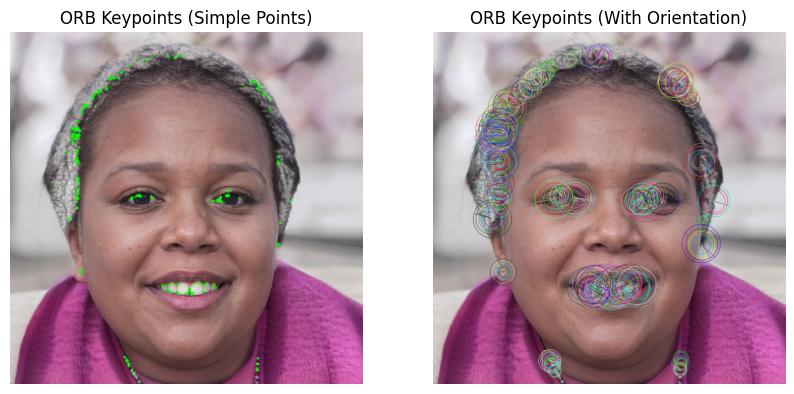

Number of ORB keypoints detected: 500
Descriptor shape: (500, 32)
Descriptor type: Binary (each descriptor is 32 bits)


In [ ]:
# c- ORB

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
orb_keypoints, orb_descriptors = orb.detectAndCompute(img_gray, None)

# Draw the results - two different visualization styles
# Simple keypoints visualization
result1 = cv2.drawKeypoints(img_rgb, orb_keypoints, None,
                           color=(0, 255, 0))

# Rich keypoints visualization (with orientation)
result2 = cv2.drawKeypoints(img_rgb, orb_keypoints, None,
                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the results
f = plt.figure(figsize=(10, 5))
f.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints (Simple Points)')
plt.axis('off')

f.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('ORB Keypoints (With Orientation)')
plt.axis('off')
plt.show()

print(f"Number of ORB keypoints detected: {len(orb_keypoints)}")
if orb_descriptors is not None:
    print(f"Descriptor shape: {orb_descriptors.shape}")
    print(f"Descriptor type: Binary (each descriptor is {orb_descriptors.shape[1]} bits)")

### **Explain your understanding here:**

ORB (Oriented FAST and Rotated BRIEF) is a fast and efficient feature detector and descriptor that combines FAST keypoint detection with BRIEF descriptors.

**Code Explanation:**
1) ORB Creation: Creates the ORB detector object
2) Feature Detection and Description:
    - `detectAndCompute()` finds keypoints and computes binary descriptors simultaneously
    - ORB provides both keypoint detection AND descriptor computation
    - Binary descriptors are more memory-efficient than SIFT's floating-point descriptors
3) Two Different Visualizations:
    - result1: Simple green dots showing keypoint locations only
    - result2: Rich visualization showing keypoint locations with orientation indicators

**Picture Explanation:**
The left image shows simple ORB keypoints as green dots marking feature locations. The right image shows the same keypoints with orientation information - circles with lines indicating the dominant direction of each feature. ORB typically detects fewer but more distinctive features compared to FAST, focusing on corner-like structures that are good for matching.

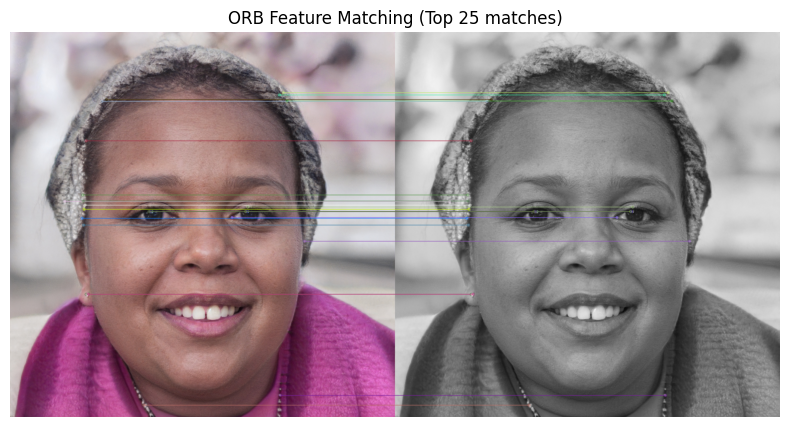

The number of matching keypoints between the original and the query image is 500


In [ ]:
# d- Finding the matching points

brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = brute_force.match(orb_descriptors, orb_descriptors)  # Matches between the same image
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches between the same image (original RGB and grayscale versions)
result = cv2.drawMatches(img_rgb, orb_keypoints, img_gray, orb_keypoints, matches[:25], None, flags=2)
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('ORB Feature Matching (Top 25 matches)')
plt.axis('off')
plt.show()

print(f"The number of matching keypoints between the original and the query image is {len(matches)}")

### **Explain your understanding here. What is the goal of this matching point?**

A brute-force matcher is a descriptor matcher that compares two sets of keypoint descriptors and generates a result that is a list of matches. For each keypoint descriptor in the first set, the matcher makes comparisons to every keypoint descriptor in the second set. Each comparison produces a distance value and the best match can be chosen on the basis of least distance (Howse, J., & Minichino, J., 2020, p. 145).

In this scenario, since we are comparing the image to itself, the original descriptors and the query descriptors are identical. As a result, each feature descriptor in the original image finds an exact match in the query image, producing a perfect match between features. Consequently, the matching distance between each pair of descriptors is zero.

A brute-force matcher technique can be used in computer forensic analysis for tasks such as matching an unknown image to a pool of candidate images.  

**Part 2- Face recognition**

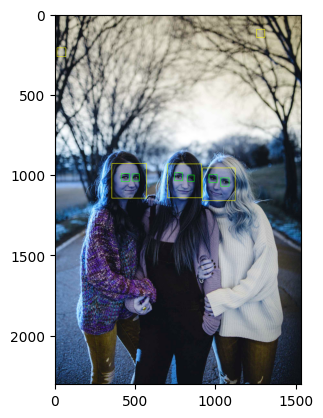

In [ ]:
#face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
#eye_cascade = cv2.CascadeClassifier("/content/haarcascade_eye.xml")
import cv2
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./haarcascade_eye.xml")

img = cv2.imread('./Assignment4_pic2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Cretae the gray version of image using openCV
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img1 = cv2.rectangle(img,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

plt.imshow(img)
#cv2.imshow(img)

In [ ]:
#b- Working on webcam
#Function to activate your laptop cam. This function is compete and you don't need to do anything.
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  # data = eval_js('takePhoto({})'.format(quality))
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# Here we call the function and open the camera
# Call function and open the camera
image_file = take_photo('photo.jpg')

#Show the read image
image = cv2.imread(image_file)
plt.imshow(image)
#Repeat the above code to detect the face and eyes in your image
# Here you should see your image while the face and eyes are detected


<IPython.core.display.Javascript object>

NameError: name 'eval_js' is not defined

**Part 3- Parameter detection**

In [ ]:
lowerBound=np.array([170,100,80])
upperBound=np.array([180,256,256])

#cam= cv2.VideoCapture(0)
kernelOpen=np.ones((5,5))
kernelClose=np.ones((20,20))

font = cv2.FONT_HERSHEY_SIMPLEX

img=cv2.imread('/content/apple.jpg')

#convert BGR to HSV
imgHSV=
# Show this image

# create the Mask
mask=cv2.inRange(imgHSV,lowerBound,upperBound)
#morphology
maskOpen=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernelOpen)
maskClose=cv2.morphologyEx(maskOpen,cv2.MORPH_CLOSE,kernelClose)

maskFinal=maskClose
conts,h=cv2.findContours(maskFinal.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img,conts,-1,(255,0,0),1)
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0))

cv2_imshow(maskClose)
cv2_imshow(maskOpen)
cv2_imshow(mask)
cv2_imshow(img)



In [ ]:
print( 'There were ',#???# ,' apples in this picture') #Print number of apples